In [2]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt


<h1>Run ETL PIPLE LINE</h1>
<h4><b>E</b>xtract data</h4> 
<h4><b>T</b>ransform Data</h4> 
<h4><b>L</b>oad data</h4> 


<h4><b>E</b>xtract data</h4> 
<b>Raw data</b>


In [5]:
UScomments=pd.read_csv('UScomments.csv',delimiter=',',on_bad_lines='skip')

/var/folders/nf/75gt_dxj21l9f2b0qy87f9hc0000gn/T/ipykernel_56617/386261101.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  UScomments=pd.read_csv('UScomments.csv',delimiter=',',on_bad_lines='skip')


<h3>Transform Data</h3>

In [7]:
UScomments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [8]:
UScomments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [9]:
UScomments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [10]:
UScomments.dropna(inplace=True)

In [11]:
UScomments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

<h1>EDA</h1>

In [13]:
UScomments

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [14]:
!pip install textblob

In [15]:
from textblob import TextBlob

In [16]:
TextBlob('trending 😉').sentiment.polarity

0.0

In [17]:
polarity = []
for comment in UScomments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
   

In [18]:
UScomments.shape

(691374, 4)

In [19]:
len(polarity)

691374

In [20]:
UScomments['polarity'] = polarity 

In [21]:
UScomments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [22]:
filter1 = UScomments['polarity']==1

In [23]:
comments_positives=UScomments[filter1]

In [24]:
filter2=UScomments['polarity'].isin([-1])

In [25]:
comments_negative=UScomments[filter2]

In [26]:
comments_positives.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [27]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [28]:
!pip install wordcloud

In [29]:
from wordcloud import WordCloud , STOPWORDS

In [30]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [31]:
WordCloud(stopwords=set(STOPWORDS)).generate()

TypeError: WordCloud.generate() missing 1 required positional argument: 'text'

In [50]:
UScomments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [52]:
total_positive_comments = comments_positives['comment_text']

In [54]:
total_positive_comments=' '.join(comments_positives['comment_text'])

In [56]:
total_positive_comments

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [58]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)

(-0.5, 399.5, 199.5, -0.5)

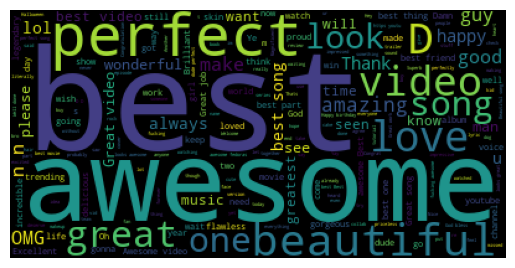

In [60]:
plt.imshow(wordcloud)
plt.axis("off")

In [62]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [64]:
total_negative_comment=' '.join(comments_negative['comment_text'])

In [66]:
worldcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comment)

(-0.5, 399.5, 199.5, -0.5)

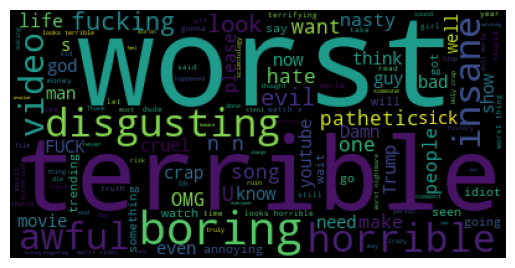

In [68]:
plt.imshow(worldcloud2)
plt.axis('off')

In [70]:
!pip install emoji==2.2.0

In [71]:
import emoji

In [74]:
UScomments['comment_text'].head(10)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
7                                 #1 trending!!!!!!!!!
8                          Happy one year vlogaversary
9    You and your shit brother may have single hand...
Name: comment_text, dtype: object

In [76]:
newcom = 'The end though 😭👍🏻❤️'

In [78]:
[char for char in newcom if char in emoji.EMOJI_DATA]

['😭', '👍', '🏻', '❤']

In [80]:
all_emoji_lists=[]
for comment in UScomments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_lists.append(char)
            

In [84]:
all_emoji_lists

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻',
 '❤',
 '😂',
 '❤',
 '💎',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😂',
 '😂',
 '😂',
 '😂',
 '😭',
 '😒',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '😊',
 '❤',
 '👈',
 '😂',
 '😂',
 '👌',
 '👌',
 '🤔',
 '👈',
 '😂',
 '😂',
 '😁',
 '💔',
 '😂',
 '👎',
 '👎',
 '👎',
 '👎',
 '👎',
 '🍎',
 '😤',
 '😂',
 '😂',
 '😂',
 '😂',
 '👈',
 '😭',
 '😭',
 '😭',
 '😢',
 '😢',
 '😢',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '💋',
 '💋',
 '👫',
 '💘',
 '😻',
 '💋',
 '💋',
 '💖',
 '💖',
 '💖',
 '💖'

In [86]:
from collections import Counter

In [88]:
Counter(all_emoji_lists).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [90]:
for i in range(10):
    Counter(all_emoji_lists).most_common(10)[i][0]

In [92]:
all_the_top_10_emojis=[Counter(all_emoji_lists).most_common(10)[i][0] for i in range(10)]

In [94]:
all_the_top_10_frequncy=[Counter(all_emoji_lists).most_common(10)[i][1] for i in range(10)]

In [96]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [98]:
trace=go.Bar(x=all_the_top_10_emojis,y=all_the_top_10_frequncy)

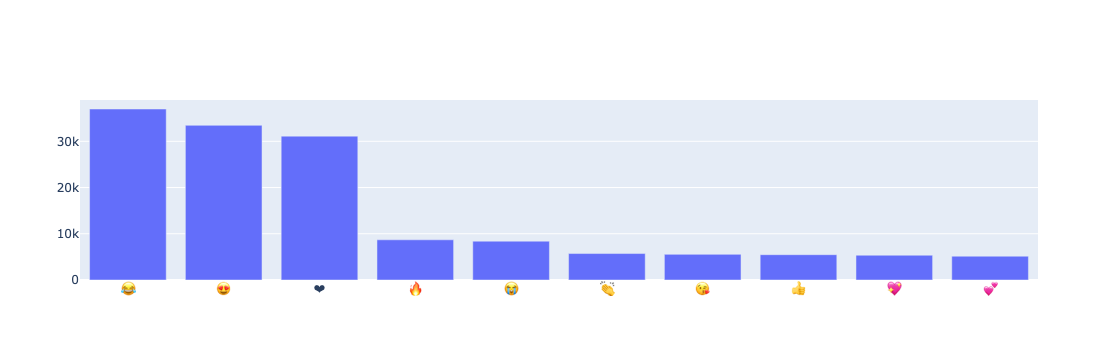

In [102]:
iplot([trace])

In [104]:
UScomments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [106]:
import os

In [108]:
file=os.listdir('/Users/arhab/Desktop/data-analyst-project/You-tube')
file

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'you-tube-sample-5000.csv',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'You-tube.ipynb',
 'DEvideos.csv',
 'JPvideos.csv',
 'you-tube-sample-5000.json',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 '.ipynb_checkpoints',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv',
 'UScomments.csv']

In [114]:
files_csv=[files for files in file if '.csv' in files]

In [116]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [118]:
files_csv

['MXvideos.csv',
 'you-tube-sample-5000.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv',
 'UScomments.csv']

In [120]:
full_df = pd.DataFrame()

In [122]:
path='/Users/arhab/Desktop/data-analyst-project/You-tube'

In [130]:
for file in filtered_file:
  currentDf=pd.read_csv(path+'/'+file,encoding='iso-8859-1',on_bad_lines='skip')
  full_df =pd.concat([full_df,currentDf],ignore_index=True)

In [126]:
filtered_file=files_csv[0:-1]

In [128]:
filtered_file

['MXvideos.csv',
 'you-tube-sample-5000.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [132]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [134]:
full_df.shape

(380942, 16)

In [136]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380942 entries, 0 to 380941
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                380942 non-null  object
 1   trending_date           380942 non-null  object
 2   title                   380942 non-null  object
 3   channel_title           380942 non-null  object
 4   category_id             380942 non-null  int64 
 5   publish_time            380942 non-null  object
 6   tags                    380942 non-null  object
 7   views                   380942 non-null  int64 
 8   likes                   380942 non-null  int64 
 9   dislikes                380942 non-null  int64 
 10  comment_count           380942 non-null  int64 
 11  thumbnail_link          380942 non-null  object
 12  comments_disabled       380942 non-null  bool  
 13  ratings_disabled        380942 non-null  bool  
 14  video_error_or_removed  380942 non-n

In [138]:
pd.read_csv('FRvideos.csv').head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [140]:
full_df=full_df.drop_duplicates()

In [142]:
full_df.shape

(343758, 16)

In [144]:
full_df.head(5000).to_csv('you-tube-sample-5000.csv',index=False)

In [146]:
full_df.head(5000).to_json('you-tube-sample-5000.json',index=False)

In [150]:

full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343758 entries, 0 to 380941
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                343758 non-null  object
 1   trending_date           343758 non-null  object
 2   title                   343758 non-null  object
 3   channel_title           343758 non-null  object
 4   category_id             343758 non-null  int64 
 5   publish_time            343758 non-null  object
 6   tags                    343758 non-null  object
 7   views                   343758 non-null  int64 
 8   likes                   343758 non-null  int64 
 9   dislikes                343758 non-null  int64 
 10  comment_count           343758 non-null  int64 
 11  thumbnail_link          343758 non-null  object
 12  comments_disabled       343758 non-null  bool  
 13  ratings_disabled        343758 non-null  bool  
 14  video_error_or_removed  343758 non-null  

In [152]:
full_df.select_dtypes('object')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,2017-11-13T05:11:58.000Z,La Voz Mexico 7,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...
...,...,...,...,...,...,...,...,...
380937,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",https://i.ytimg.com/vi/l884wKofd54/default.jpg,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
380938,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
380939,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...
380940,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,Eleni Foureira represented Cyprus at the first...


In [154]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [162]:
full_df['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [168]:
json_df=pd.read_json('GB_category_id.json')

In [170]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [174]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [176]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [182]:
cat_dict={}
for item in json_df['items'].values:
    cat_dict[int(item['id'])]=item['snippet']['title']

In [184]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [189]:
full_df['category_name']=full_df['category_id'].map(cat_dict)

In [191]:
 full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380937,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Music
380938,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Music
380939,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...,Music
380940,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,Entertainment


In [198]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics


In [200]:
full_df['likes'].describe()

count    3.437580e+05
mean     3.434527e+04
std      1.524306e+05
min      0.000000e+00
25%      5.970000e+02
50%      3.052000e+03
75%      1.530700e+04
max      5.613827e+06
Name: likes, dtype: float64

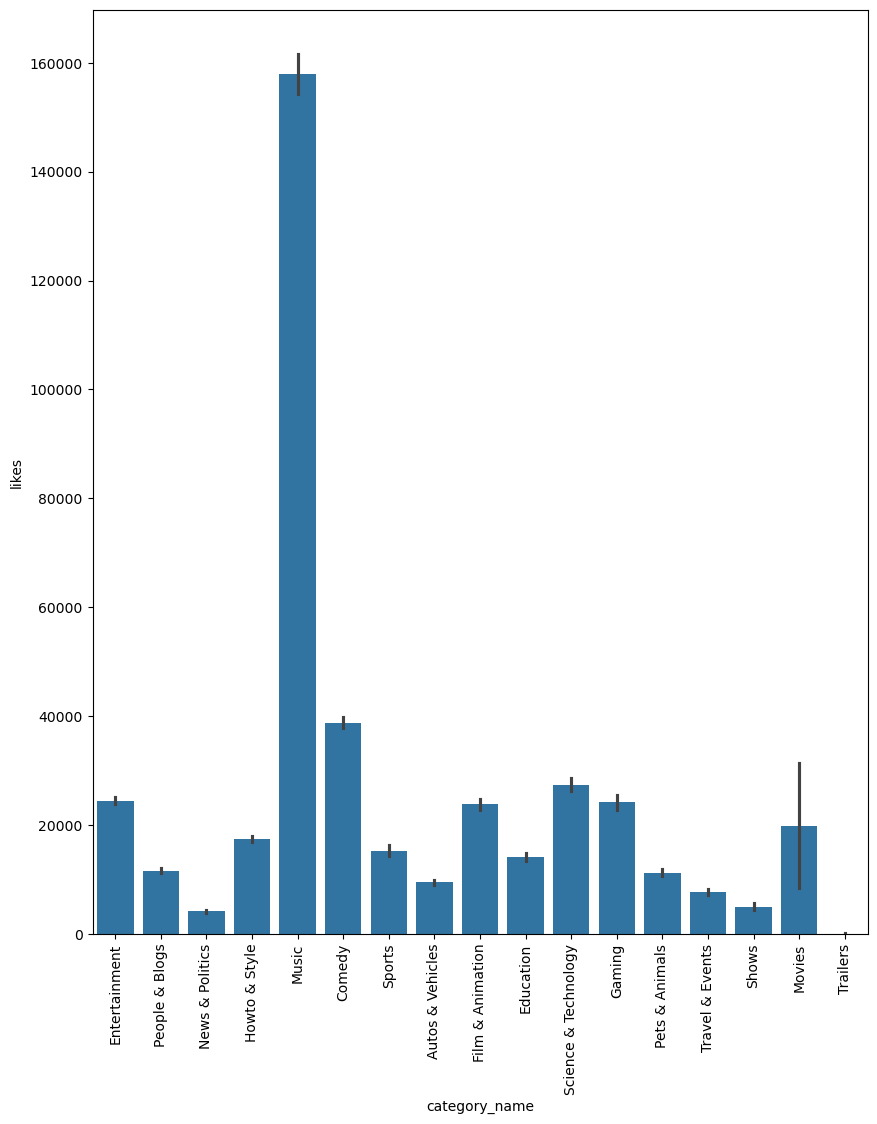

In [232]:
plt.figure(figsize=(10,12))
sns.barplot(x='category_name',y='likes',data = full_df)
plt.xticks(rotation=90)
plt.show()

In [234]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343758 entries, 0 to 380941
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                343758 non-null  object
 1   trending_date           343758 non-null  object
 2   title                   343758 non-null  object
 3   channel_title           343758 non-null  object
 4   category_id             343758 non-null  int64 
 5   publish_time            343758 non-null  object
 6   tags                    343758 non-null  object
 7   views                   343758 non-null  int64 
 8   likes                   343758 non-null  int64 
 9   dislikes                343758 non-null  int64 
 10  comment_count           343758 non-null  int64 
 11  thumbnail_link          343758 non-null  object
 12  comments_disabled       343758 non-null  bool  
 13  ratings_disabled        343758 non-null  bool  
 14  video_error_or_removed  343758 non-null  

In [242]:
full_df['like_rate']=(full_df['likes'] / full_df['views']) * 100
full_df['dislike_rate']=(full_df['dislikes'] / full_df['views']) * 100
full_df['comment_count_rate']=(full_df['comment_count'] / full_df['views']) * 100

In [244]:
full_df.shape

(343758, 20)

In [250]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

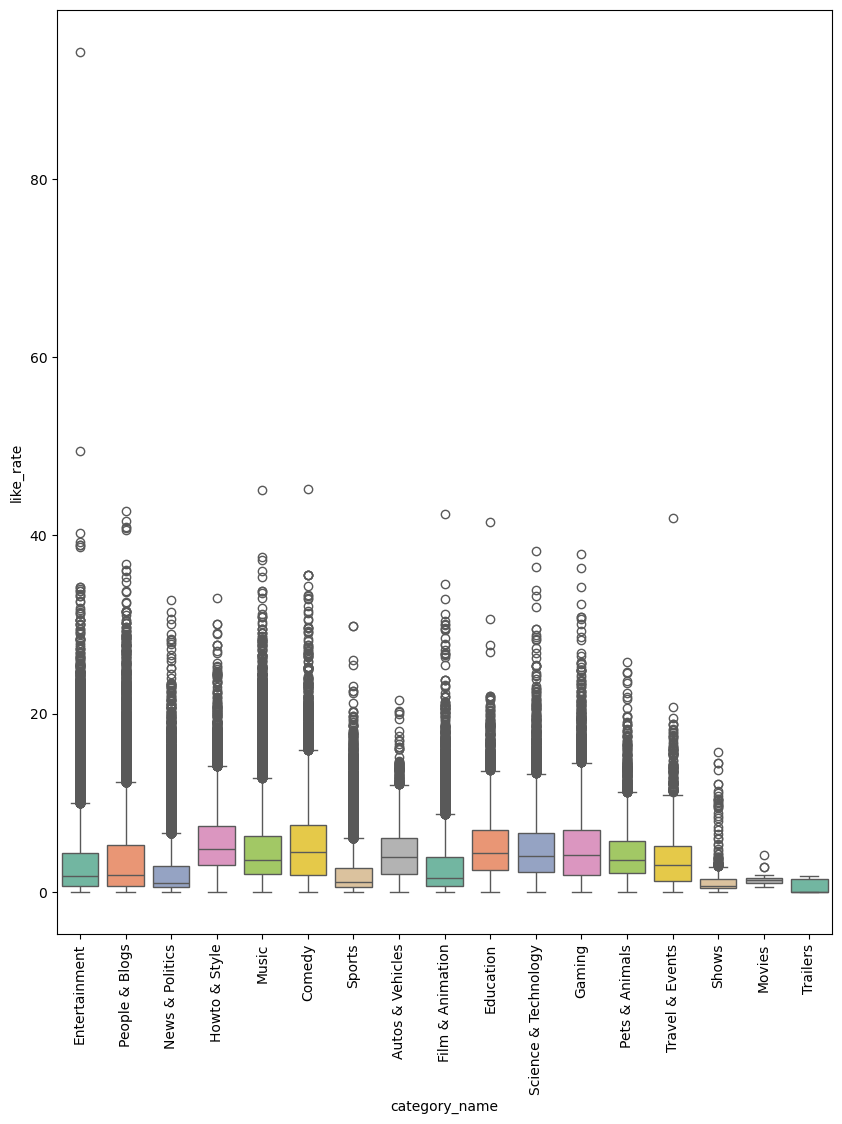

In [260]:
plt.figure(figsize=(10,12))
sns.boxplot(x='category_name',y='like_rate',data=full_df,palette="Set2")
plt.xticks(rotation=90)
plt.show()

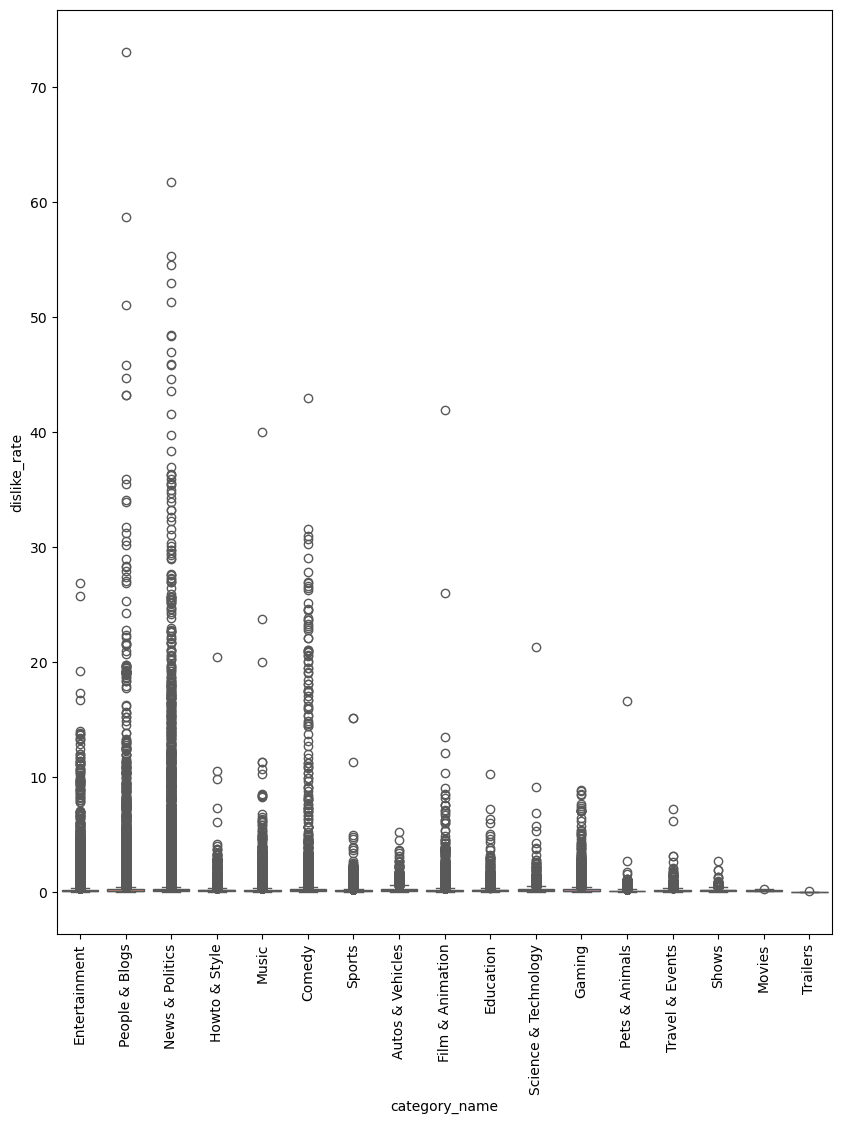

In [262]:
plt.figure(figsize=(10,12))
sns.boxplot(x='category_name',y='dislike_rate',data=full_df,palette="Set2")
plt.xticks(rotation=90)
plt.show()

In [264]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [268]:
full_df[[ 'views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779406,0.405386
likes,0.779406,1.000000,0.452103
dislikes,0.405386,0.452103,1.000000


<Axes: >

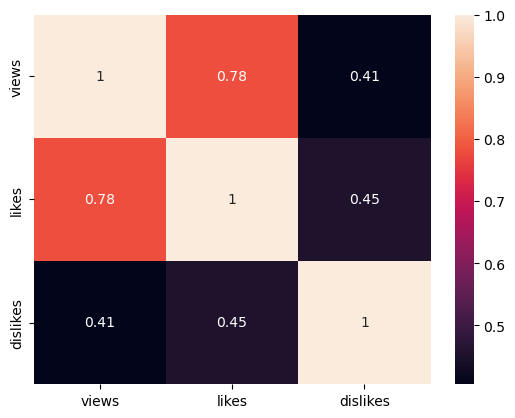

In [272]:
sns.heatmap(full_df[[ 'views', 'likes', 'dislikes']].corr(),annot=True)

<Axes: xlabel='views', ylabel='likes'>

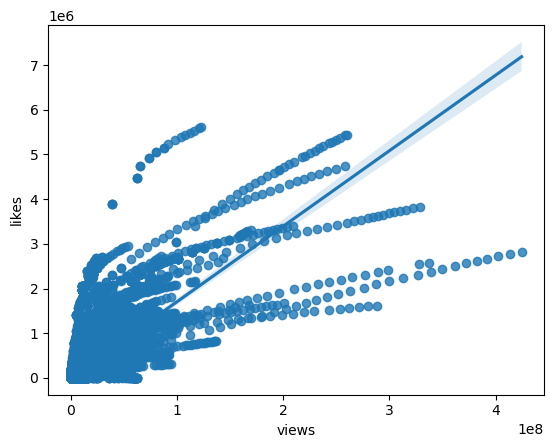

In [274]:
sns.regplot(x='views',y='likes' ,data=full_df)

In [276]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380937,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Music,1.069488,0.050995,0.039626
380938,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Music,4.154752,0.923524,1.630458
380939,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...,Music,1.332022,0.029999,0.067433
380940,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,Entertainment,1.060729,0.320412,0.186946


In [280]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert            710
WWE                                           649
Late Night with Seth Meyers                   599
TheEllenShow                                  557
Jimmy Kimmel Live                             531
                                             ... 
ãæ¯ã¡ããããè¦é¢ç¾å®¹ãªã¿ã¯      1
ã¢ã¤ãã¥ã¼ã                              1
æ¹ï¨JAPAN                                     1
ããã¤ã¾ã                                 1
The Chainsmokers                                1
Name: count, Length: 38022, dtype: int64

In [294]:
total_channel_count = full_df.groupby('channel_title').size().sort_values(ascending=False).reset_index(name='size')

In [296]:
total_channel_count

,channel_title,size
0,The Late Show with Stephen Colbert,710
1,WWE,649
2,Late Night with Seth Meyers,599
3,TheEllenShow,557
4,Jimmy Kimmel Live,531
...,...,...
38017,astamaoi,1
38018,at Entertainment,1
38019,ath hamdoune.fr,1
38020,Muscle Boy Fit,1


In [302]:
total_channel_count=total_channel_count.rename(columns={'size':'total_videos'})

In [304]:
total_channel_count

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,649
2,Late Night with Seth Meyers,599
3,TheEllenShow,557
4,Jimmy Kimmel Live,531
...,...,...
38017,astamaoi,1
38018,at Entertainment,1
38019,ath hamdoune.fr,1
38020,Muscle Boy Fit,1


In [306]:
import plotly.express as px

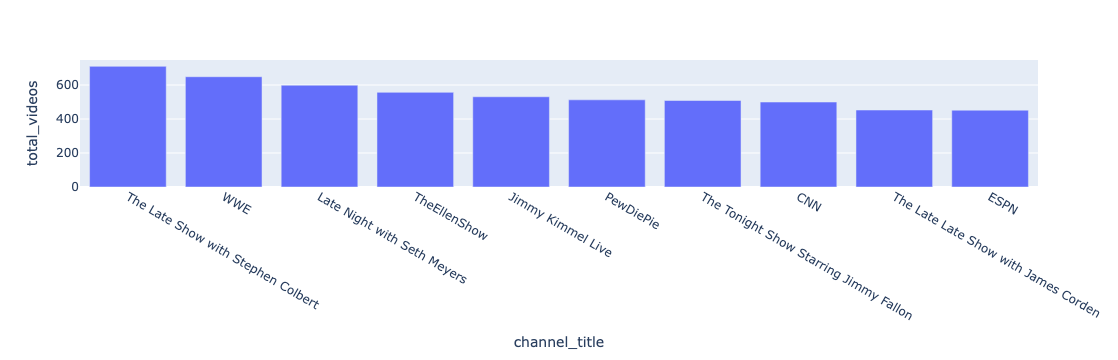

In [336]:
px.bar(total_channel_count.head(10),x='channel_title',y='total_videos')


In [348]:
top_20=total_channel_count.head(10)

<Axes: xlabel='channel_title'>

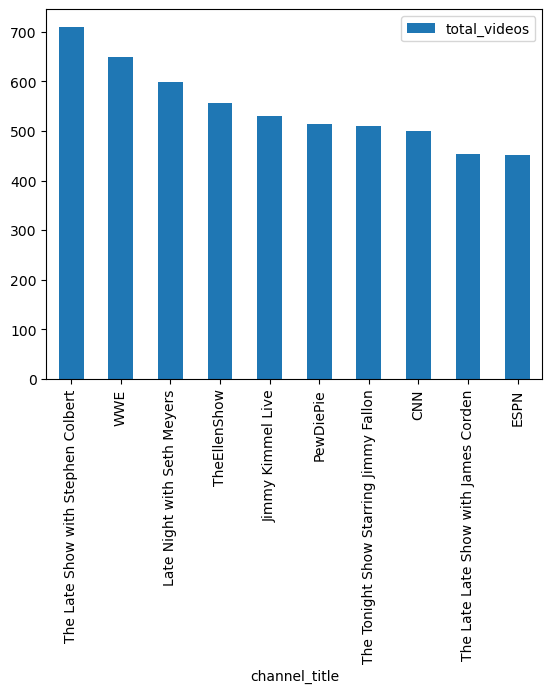

In [350]:
top_20.plot(kind='bar',x='channel_title',y='total_videos')

In [352]:
full_df['title'][0]

'CapÃ\xadtulo 12 | MasterChef 2017'

In [354]:
import string

In [356]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [366]:
len([char for char in full_df['title'][1] if char in string.punctuation])

3

def punctation_count(text):
    return len([char for char in text if char in string.punctuation])
    

In [373]:
full_df['title'].apply(lambda text:len([char for char in text if char in string.punctuation]))

0         1
1         3
2         1
3         1
4         1
         ..
380937    4
380938    3
380939    4
380940    6
380941    5
Name: title, Length: 343758, dtype: int64

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380937,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Music,1.069488,0.050995,0.039626
380938,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Music,4.154752,0.923524,1.630458
380939,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...,Music,1.332022,0.029999,0.067433
380940,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,Entertainment,1.060729,0.320412,0.186946


In [387]:
sample_df=full_df.copy()

In [398]:
sample_df['count_punc']=sample_df['title'].apply(lambda text: len([char for char in text if char in string.punctuation]))

In [400]:
sample_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,...,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010,1
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,...,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522,3
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,...,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114,1
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,...,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322,1
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,...,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380937,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,...,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Music,1.069488,0.050995,0.039626,4
380938,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,...,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Music,4.154752,0.923524,1.630458,3
380939,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,...,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...,Music,1.332022,0.029999,0.067433,4
380940,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,...,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,Entertainment,1.060729,0.320412,0.186946,6


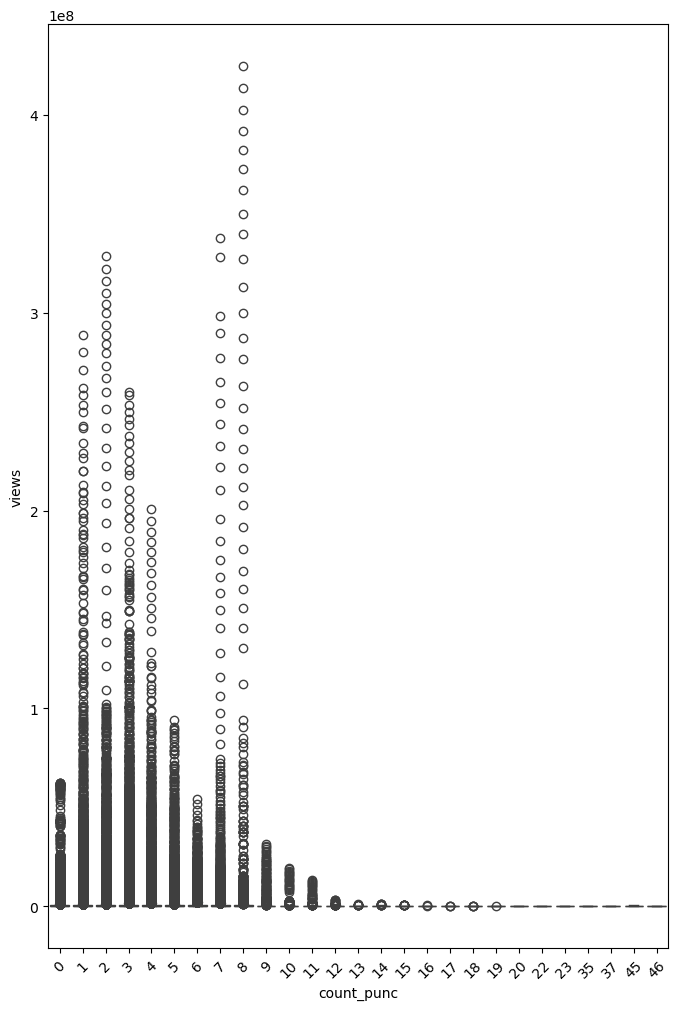

In [408]:
plt.figure(figsize=(8,12))
sns.boxplot(x='count_punc',y='views',data=sample_df)
plt.xticks(rotation=45)
plt.show()

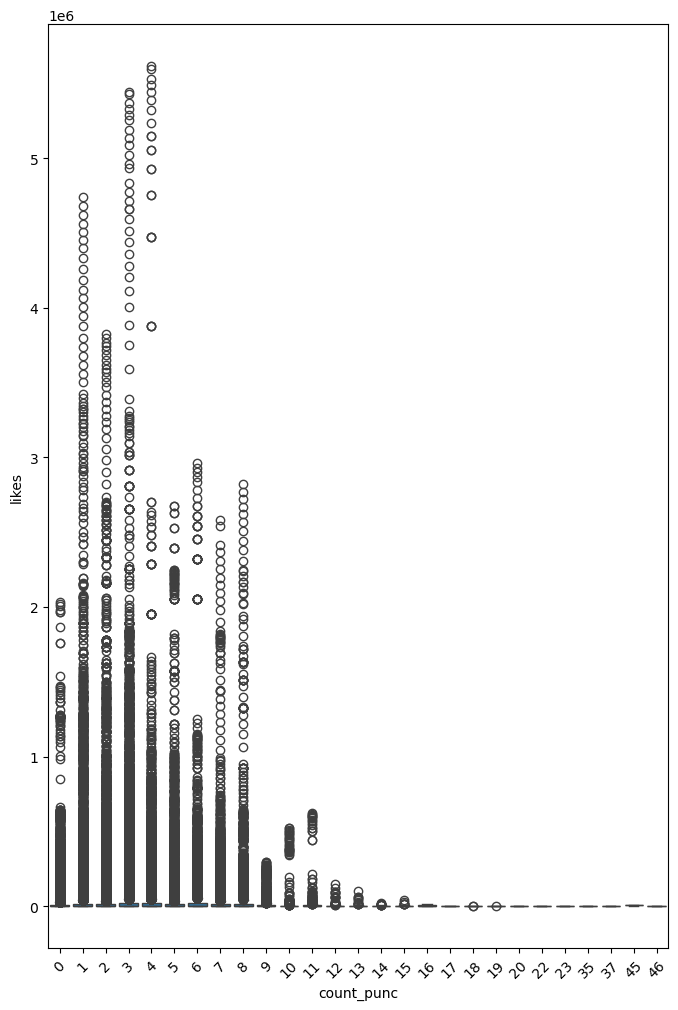

In [410]:
plt.figure(figsize=(8,12))
sns.boxplot(x='count_punc',y='likes',data=sample_df)
plt.xticks(rotation=45)
plt.show()